In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=112d83ec95ca60b82dbaf10c2d9a79c2fdea914ad7289d38defac94837c2aa41
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib
import numpy as np

In [19]:
df = pd.read_csv("sample_pandas_6.csv")

def tax(x):
    return x * 1.10

df['単価'].apply(tax)

category_df = pd.read_csv('category.csv')
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,飲料水
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,弁当
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,弁当
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,弁当
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,飲料水
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,デザート
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,雑貨


In [20]:
df['カテゴリー'].unique()

array(['弁当', '飲料水', '菓子類', '図書・新聞', 'デザート', '雑貨'], dtype=object)

In [31]:
ct_list=[]

for i in df['カテゴリー'].unique():
  ct_list.append(len(df[df['カテゴリー']==i]))

In [32]:
ct_list

[49, 36, 38, 20, 30, 27]

<BarContainer object of 6 artists>

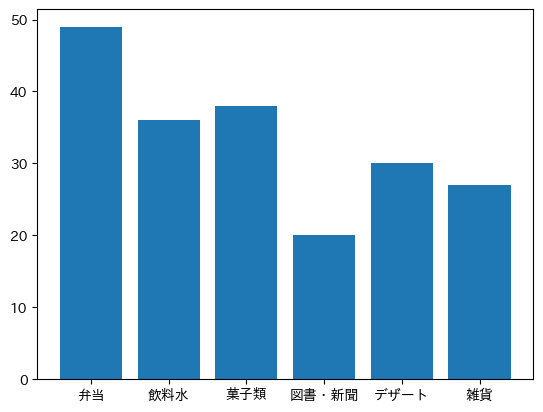

In [33]:
x = np.arange(6)
y = np.array(ct_list)
label = df['カテゴリー'].unique()
#plt.title("")
plt.bar(x, y, tick_label=label)

In [45]:
print(len(df['商品番号'].unique()))
df['商品番号'].unique()

10


array(['YY4HAAZR', 'Z4WOOIYV', '1QJFO8QY', 'MESUDVWQ', 'S6RE8W6X',
       'X0ZE2ZMY', '8T7D5DQA', '48XMJXKO', 'QRMOGNUU', '2HSTCDWM'],
      dtype=object)

In [46]:
df['商品番号'].unique()[0]

'YY4HAAZR'

In [49]:
df[df['商品番号']=='YY4HAAZR'].describe()['注文数']

,注文数
count,17.000000
mean,31.764706
std,18.095336
min,0.000000
25%,18.000000
50%,30.000000
75%,42.000000
max,60.000000


In [41]:
print(df.groupby('商品番号')['注文数'].describe())

          count       mean        std  min   25%   50%   75%   max
商品番号                                                              
1QJFO8QY   32.0  35.250000  18.461818  0.0  24.0  36.0  49.5  60.0
2HSTCDWM   20.0  29.400000  21.137146  0.0  12.0  27.0  48.0  60.0
48XMJXKO   10.0  21.600000  13.326665  0.0  13.5  21.0  30.0  42.0
8T7D5DQA   21.0  25.142857  18.260027  0.0  12.0  36.0  42.0  54.0
MESUDVWQ   17.0  43.764706  18.219253  0.0  42.0  48.0  54.0  60.0
QRMOGNUU   27.0  33.111111  16.588535  6.0  21.0  36.0  48.0  60.0
S6RE8W6X   20.0  33.300000  21.631118  0.0  12.0  39.0  54.0  60.0
X0ZE2ZMY   14.0  21.857143  21.901377  0.0   1.5  15.0  39.0  60.0
YY4HAAZR   17.0  31.764706  18.095336  0.0  18.0  30.0  42.0  60.0
Z4WOOIYV   22.0  26.727273  19.218498  0.0  12.0  24.0  42.0  60.0


Index([  0,   2,   3,   4,   8,  13,  15,  18,  19,  29,  57,  58,  69,  72,
        74,  76,  78,  83,  88,  94,  95, 102, 110, 112, 113, 114, 115, 126,
       133, 137, 138, 139, 146, 149, 151, 152, 153, 159, 162, 163, 164, 168,
       169, 170, 173, 181, 191, 193, 195],
      dtype='int64')

In [ ]:
df[df['カテゴリー']=='弁当'].index